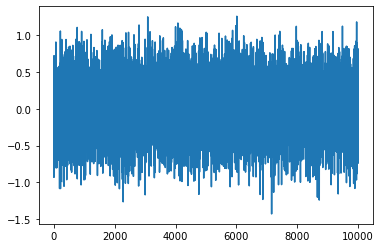

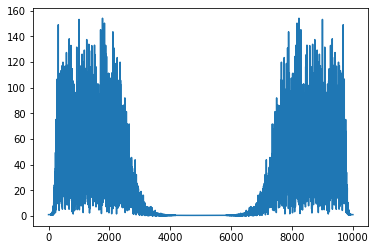

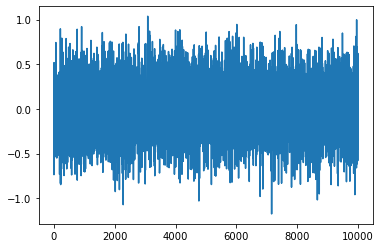

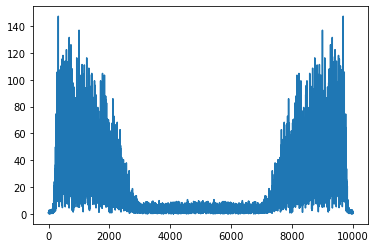

In [37]:
from scipy.io import wavfile
from scipy.signal import sosfilt, butter, wiener, stft, istft
import numpy as np
import matplotlib.pyplot as plt


fs = 16000
sample = np.random.uniform(-1,1,10000)

# bandpass filter
sos = butter(5, [400, 4000], btype='bandpass', output='sos', fs=fs)
filtered = sosfilt(sos, sample, axis=0)

# wiener filter
#f, t, fourier = stft(filtered, fs=fs)
#yw = wiener(fourier)
#y = np.asarray(istft(yw))
#y = y[1, :]
y = wiener(filtered)

# plot them
plt.figure(1)
plt.plot(filtered)
plt.figure(2)
plt.plot(np.abs(np.fft.fft(filtered)))
plt.figure(3)
plt.plot(y)
plt.figure(4)
plt.plot(np.abs(np.fft.fft(y)))


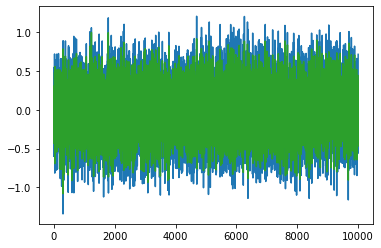

In [35]:
from astroML.filters import savitzky_golay, wiener_filter

t = np.arange(len(filtered))
filtered_smooth, PSD, P_S, P_N, Phi = wiener_filter(t, filtered, return_PSDs=True)

plt.plot(filtered)
plt.plot(filtered_smooth)
plt.plot(wiener1d)